Step 2. 
Get the dataGet the data
Convert the data to a format you can easily manipulate (without changing the data itself).

In [4]:
import pandas as pd

#Importing the dataset
dataset = pd.read_csv('Data/50_Startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
#Extracting possible features: R&D Spend, Administration, Marketing Spend & State
X = dataset.iloc[:, :-1].values

# Extraction labels: Profit
y = dataset.iloc[:, 4].values



In [6]:
# Check the size and type of data (time series, sample, geographical, etc.).
print('Data set info:')
print(dataset.info())

print('States with count:')
print(dataset["State"].value_counts())

print('Data set type:')
print(type(dataset))

print('Data set description:')
print(dataset.describe())

Data set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
States with count:
New York      17
California    17
Florida       16
Name: State, dtype: int64
Data set type:
<class 'pandas.core.frame.DataFrame'>
Data set description:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   1

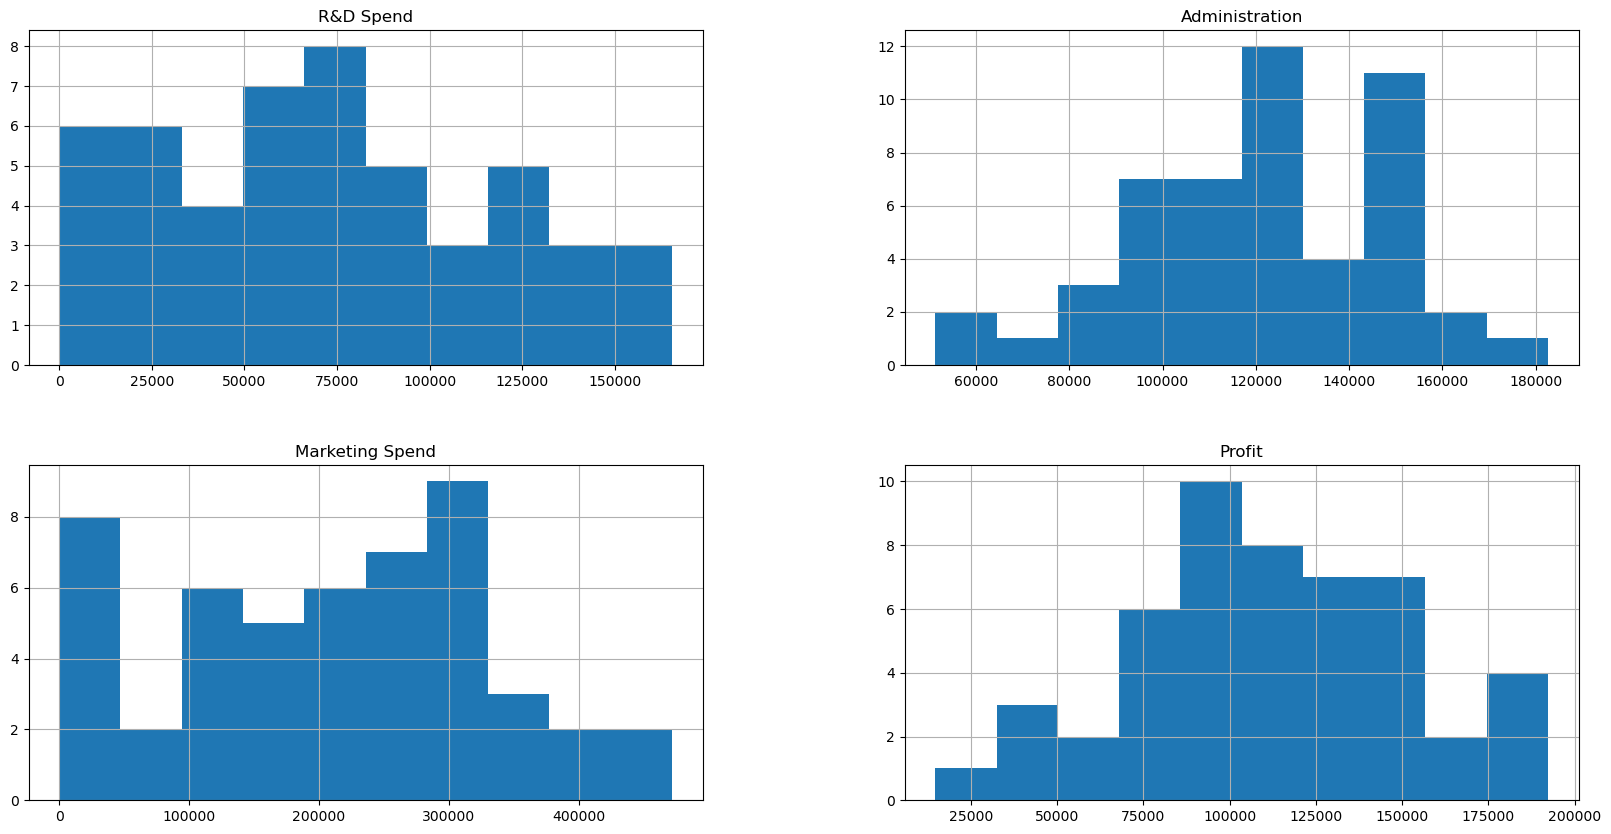

In [65]:
import matplotlib.pyplot as plt

dataset.hist(figsize=(20,10))

plt.show()

Create a test set, put it aside, and never look at it (no data snooping!).
A problem here is that the data set is small -> Use stratification.
Action: Make stratified test and learning sets (1 fold).
Code is to be established in your notebook.


In [59]:
import numpy as np
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [61]:
train_set, test_set = shuffle_and_split_data(dataset, 0.2)

print(len(train_set))

print(len(test_set))

print(test_set)

40
10
    R&D Spend  Administration  Marketing Spend       State     Profit
48     542.05        51743.15             0.00    New York   35673.41
27   72107.60       127864.55        353183.81    New York  105008.31
35   46014.02        85047.44        205517.64    New York   96479.51
25   64664.71       139553.16        137962.62  California  107404.34
41   27892.92        84710.77        164470.71     Florida   77798.83
10  101913.08       110594.11        229160.95     Florida  146121.95
47       0.00       135426.92             0.00  California   42559.73
7   130298.13       145530.06        323876.68     Florida  155752.60
31   61136.38       152701.92         88218.23    New York   97483.56
21   78389.47       153773.43        299737.29    New York  111313.02


In [41]:
from zlib import crc32
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
    
    

In [52]:
startup_with_id = dataset.reset_index() # adds an `index` column

train_set, test_set = split_data_with_id_hash(startup_with_id, 0.2, "index")
print("Stable test set based on rows index, 80% size od training set")
print(test_set)

Stable test set based on rows index, 80% size od training set
    index  R&D Spend  Administration  Marketing Spend       State     Profit
2       2  153441.51       101145.55        407934.54     Florida  191050.39
5       5  131876.90        99814.71        362861.36    New York  156991.12
12     12   93863.75       127320.38        249839.44     Florida  141585.52
16     16   78013.11       121597.55        264346.06  California  126992.93
23     23   67532.53       105751.03        304768.73     Florida  108733.99
25     25   64664.71       139553.16        137962.62  California  107404.34
30     30   61994.48       115641.28         91131.24     Florida   99937.59
35     35   46014.02        85047.44        205517.64    New York   96479.51
36     36   28663.76       127056.21        201126.82     Florida   90708.19
42     42   23640.93        96189.63        148001.11  California   71498.49
45     45    1000.23       124153.04          1903.93    New York   64926.08
49     49     

In [64]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)
# X is the feature matrix, y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

print(X_train)

# print("test set using sklearn instead")
# print(test_set)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

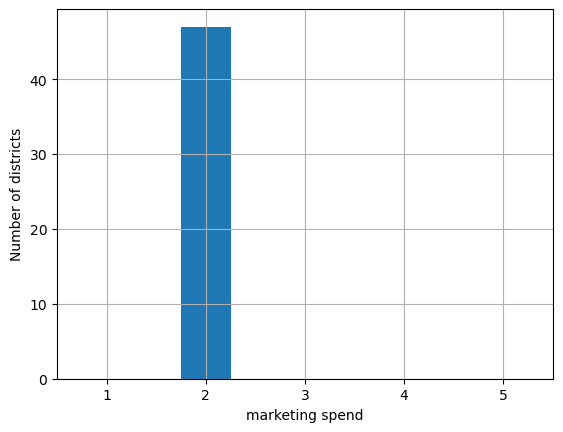

In [ ]:
dataset["Marketing Spend"] = pd.cut(dataset["Marketing Spend"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])
 
 
dataset["Marketing Spend"].value_counts().sort_index().plot.bar(rot=0, grid=True) 
plt.xlabel("marketing spend")
plt.ylabel("Number of districts")
plt.show()



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(dataset, dataset["Marketing Spend"]):
    strat_train_set_n = dataset.iloc[train_index]
    strat_test_set_n = dataset.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').